In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.listdir()

['GunViolence_2013-2018_Cleaned.ipynb',
 'README.md',
 '.ipynb',
 'GunViolenceDataUSA_01-2013_to_03-2018_UNCLEANED.csv.tar.gz',
 '.gitkeep',
 'GunViolenceDataUSA_01-2013_to_03-2018_UNCLEANED.csv',
 '.ipynb_checkpoints']

In [3]:
main_df = pd.read_csv(os.listdir()[-2])

In [4]:
main_df.head(3)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0


In [5]:
main_df.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

In [6]:
main_df.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

In [7]:
print('DataFrame Original tiene {} columnas/features'.format(len(main_df.columns)))

DataFrame Original tiene 29 columnas/features


In [8]:
cols_to_drop = ['incident_url', 'source_url', 'incident_url_fields_missing', 'participant_name', 'participant_relationship', 'notes', 'sources',
               'address', 'incident_characteristics', 'location_description', 'participant_age_group', 'gun_stolen', 'gun_type', 'state_house_district', 'state_senate_district', 
               'congressional_district', 'latitude', 'longitude']

In [9]:
main_df.drop(columns = cols_to_drop, axis = 1, inplace=True)

In [10]:
main_df.tail(10)

,incident_id,date,state,city_or_county,n_killed,n_injured,n_guns_involved,participant_age,participant_gender,participant_status,participant_type
239667,1082234,2018-03-31,Tennessee,Memphis,0,1,1.0,0::69||1::35,0::Male||1::Female,0::Injured||1::Arrested,0::Victim||1::Subject-Suspect
239668,1081742,2018-03-31,Michigan,Detroit,0,1,1.0,NaN,0::Male,0::Injured,0::Victim
239669,1082990,2018-03-31,Wisconsin,Madison,0,0,1.0,NaN,NaN,NaN,NaN
239670,1081752,2018-03-31,Illinois,Chicago,0,1,1.0,0::36,0::Male||1::Male,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect
239671,1082061,2018-03-31,Washington,Spokane (Spokane Valley),0,0,1.0,0::48,0::Male,"0::Unharmed, Arrested",0::Subject-Suspect
239672,1083142,2018-03-31,Louisiana,Rayne,0,0,1.0,0::25,0::Female,"0::Unharmed, Arrested",0::Subject-Suspect
239673,1083139,2018-03-31,Louisiana,Natchitoches,1,0,1.0,1::21,0::Male||1::Male,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect
239674,1083151,2018-03-31,Louisiana,Gretna,0,1,1.0,0::21,0::Male,0::Injured,0::Victim
239675,1082514,2018-03-31,Texas,Houston,1,0,1.0,0::42,0::Male,0::Killed,0::Victim
239676,1081940,2018-03-31,Maine,Norridgewock,2,0,2.0,0::58||1::62,0::Female||1::Male,0::Killed||1::Killed,0::Victim||1::Subject-Suspect


In [11]:
def av_participant_age(s):
    import re

    x = re.sub("[0-9][:?]|[:]|[|]", " ", str(s))

    l = [int(i) for i in " ".join(x.split()).split()]
    
    return sum(l)/len(l)


def strip_word_col(s):
    import re

    x = re.sub("[\w][:?]|[:]|[|]", " ", s)

    l = [i for i in " ".join(x.split()).split()]
    
    return l

In [12]:
main_df['participant_age'] = main_df['participant_age'].map(av_participant_age, na_action='ignore')

In [13]:
main_df['participant_age'].fillna(main_df['participant_age'].median(), inplace=True)

In [14]:
main_df['participant_gender'] = main_df['participant_gender'].map(strip_word_col, na_action='ignore')

In [15]:
males = [str(i).count('Male') for i in main_df['participant_gender']]
females = [str(i).count('Female') for i in main_df['participant_gender']]

main_df['Males Involved*'] = males
main_df['Females Involved*'] = females

# Males Involved significa el total de hombres involucrados en el incidentes, ya sea asesinados, lastimados o unharmed
# Females Involed es lo mismo que lo anterior para mujeres

In [16]:
main_df['participant_status'] = main_df['participant_status'].map(strip_word_col, na_action='ignore')

In [17]:
arrested = [str(i).count('Arrested') for i in main_df['participant_status']]
unharmed = [str(i).count('Unharmed') for i in main_df['participant_status']]

main_df['N_Arrested'] = arrested
main_df['N_Unharmed'] = unharmed

In [18]:
main_df['participant_type'] = main_df['participant_type'].map(strip_word_col, na_action='ignore')

In [19]:
victim = [str(i).count('Victim') for i in main_df['participant_type']]
suspect = [str(i).count('Subject-Suspect') for i in main_df['participant_type']]    
    
main_df['N_Victims'] = victim
main_df['N_Suspects'] = suspect


In [20]:
drop_cols = ["participant_type", "participant_gender", "participant_status"]
main_df.drop(columns=drop_cols, axis=1, inplace=True)

In [21]:
main_df

,incident_id,date,state,city_or_county,n_killed,n_injured,n_guns_involved,participant_age,Males Involved*,Females Involved*,N_Arrested,N_Unharmed,N_Victims,N_Suspects
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,20.000000,3,1,1,0,4,1
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,20.000000,1,0,0,0,4,1
2,478855,2013-01-01,Ohio,Lorain,1,3,2.0,31.200000,5,0,2,2,3,2
3,478925,2013-01-05,Colorado,Aurora,4,0,NaN,37.750000,3,1,0,0,3,1
4,478959,2013-01-07,North Carolina,Greensboro,2,2,2.0,31.250000,2,2,0,0,3,1
5,478948,2013-01-07,Oklahoma,Tulsa,4,0,NaN,33.500000,2,4,2,2,4,2
6,479363,2013-01-19,New Mexico,Albuquerque,5,0,2.0,20.333333,3,3,1,1,5,1
7,479374,2013-01-21,Louisiana,New Orleans,0,5,NaN,27.000000,5,0,0,0,5,1
8,479389,2013-01-21,California,Brentwood,0,4,NaN,27.000000,5,0,0,1,4,1
9,492151,2013-01-23,Maryland,Baltimore,1,6,NaN,15.000000,1,0,0,0,7,0


In [22]:
main_df.isnull().sum()

incident_id              0
date                     0
state                    0
city_or_county           0
n_killed                 0
n_injured                0
n_guns_involved      99451
participant_age          0
Males Involved*          0
Females Involved*        0
N_Arrested               0
N_Unharmed               0
N_Victims                0
N_Suspects               0
dtype: int64

In [23]:
main_df['n_guns_involved'].describe()

count    140226.000000
mean          1.372442
std           4.678202
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         400.000000
Name: n_guns_involved, dtype: float64

In [24]:
main_df['n_guns_involved'].quantile(0.90)

1.0

In [25]:
main_df['n_guns_involved'] = main_df['n_guns_involved'].fillna(main_df['n_guns_involved'].quantile(0.90))

In [26]:
main_df['n_guns_involved'].describe()

count    239677.000000
mean          1.217902
std           3.583024
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         400.000000
Name: n_guns_involved, dtype: float64

In [27]:
rows, cols = main_df.shape
print(f"*Total de Rows y Cols en Dataframe*\n-Rows: {rows}\n-Columns:{cols}")

*Total de Rows y Cols en Dataframe*
-Rows: 239677
-Columns:14


In [28]:
main_df['n_guns_involved'].sum()

291903.0

In [29]:
main_df.isnull().sum()

incident_id          0
date                 0
state                0
city_or_county       0
n_killed             0
n_injured            0
n_guns_involved      0
participant_age      0
Males Involved*      0
Females Involved*    0
N_Arrested           0
N_Unharmed           0
N_Victims            0
N_Suspects           0
dtype: int64

In [30]:
av_age_people_KilledOrInured_by_state = main_df.groupby('state')['participant_age'].mean().sort_values()

In [31]:
states_metrics =  main_df.groupby('state')['n_killed','n_injured', 'N_Unharmed', 'n_guns_involved', 'Males Involved*', "Females Involved*", "N_Victims", 'N_Suspects', 'N_Arrested' ].sum().sort_values(by=['n_killed'],ascending=False).astype('int64')

In [32]:
states_metrics['Av Age Ppl Killed | Injured'] = round(av_age_people_KilledOrInured_by_state,2)

In [33]:
states_metrics

,n_killed,n_injured,N_Unharmed,n_guns_involved,Males Involved*,Females Involved*,N_Victims,N_Suspects,N_Arrested,Av Age Ppl Killed | Injured
state,,,,,,,,,,
California,5562,7644,11064,23695,21251,2398,13064,13473,6702,29.13
Texas,5046,6106,12254,15782,19100,3128,11959,13272,5517,29.19
Florida,3909,7072,12157,19214,18361,2846,11863,12059,6128,29.12
Illinois,3409,13514,10093,19621,23721,2290,17367,10403,3368,26.99
Ohio,2508,5703,7592,12553,13412,1839,8826,8163,3573,28.62
Georgia,2456,4056,8503,10027,12386,2079,7768,8060,3588,28.64
Pennsylvania,2395,5056,5648,10720,11940,1498,7804,6793,3217,28.95
North Carolina,2225,4629,7518,10204,11794,1590,7549,7613,3619,28.81
Louisiana,2179,4398,7455,9102,11703,1707,7743,7250,3311,28.66


In [34]:
states_metrics.describe()

,n_killed,n_injured,N_Unharmed,n_guns_involved,Males Involved*,Females Involved*,N_Victims,N_Suspects,N_Arrested,Av Age Ppl Killed | Injured
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1185.647059,2321.607843,3733.000000,5723.588235,6060.607843,846.509804,3785.490196,3907.117647,1947.705882,29.429804
std,1246.782544,2550.606870,3233.451172,5295.019404,5764.492346,766.450660,3863.347043,3428.470059,1605.756972,1.432397
min,57.000000,52.000000,181.000000,309.000000,255.000000,54.000000,111.000000,207.000000,134.000000,26.990000
25%,270.000000,596.000000,1265.500000,1901.500000,2002.000000,248.000000,1034.000000,1395.000000,673.500000,28.650000
50%,799.000000,1347.000000,2777.000000,4047.000000,3858.000000,614.000000,2367.000000,2854.000000,1580.000000,29.170000
75%,1698.000000,3366.500000,5530.000000,7661.500000,8109.000000,1361.500000,5457.000000,5500.000000,2911.500000,30.010000
max,5562.000000,13514.000000,12254.000000,23695.000000,23721.000000,3128.000000,17367.000000,13473.000000,6702.000000,33.710000


In [35]:
states_metrics.to_csv('USA_GunViolence_2013-2018_cleaned.csv')

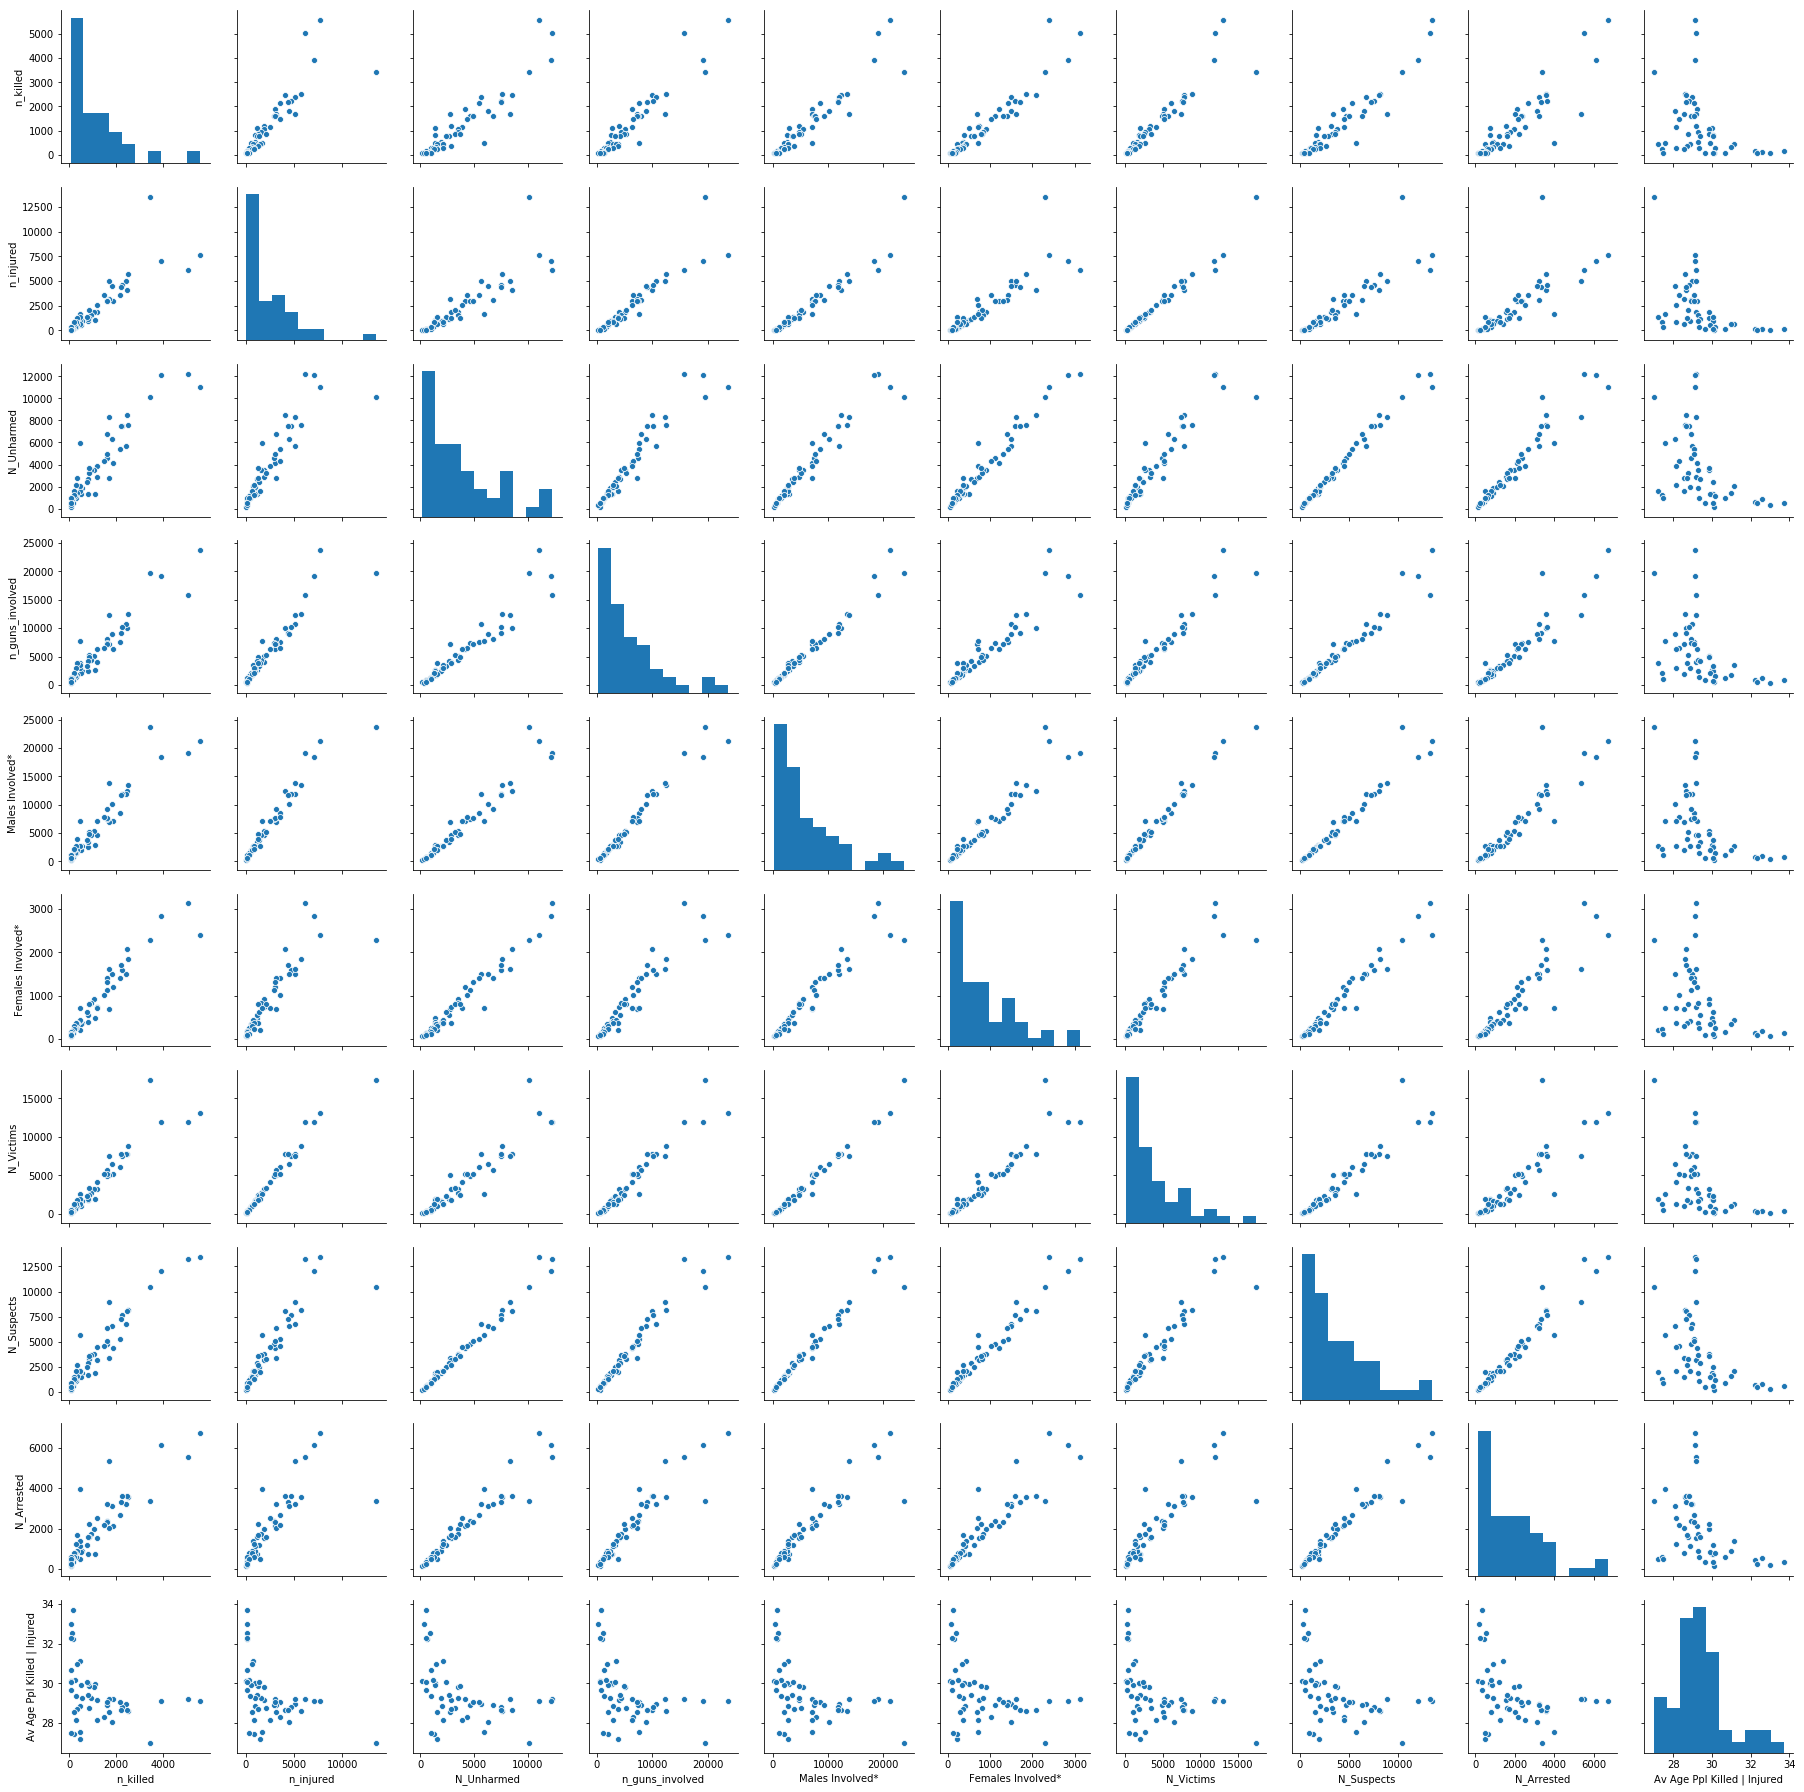

In [37]:
import seaborn as sns
sns.pairplot(states_metrics)